# HW4 ( Neural Network)

### Netid : aadcosta ###
### Seating Pin : 79 ###

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt
from keras.regularizers import l1,l2
import tensorflow as tf
from tensorflow import keras

In [2]:
keras.utils.set_random_seed(3)

##### Extract features and label for the data

In [3]:
# Load your dataset (replace 'data.csv' with your actual data file)
data = pd.read_csv('E:\MS\MS_studies\Sem_2\IntrotoML\HW3\\71-80.csv')

In [4]:
X_data = data.iloc[:, [3,4,5,6,7]]
y = data.iloc[:, [8]]

##### Normalize the features[ Both X and Y]

In [5]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X_data)
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

##### Split the data into training and testing sets


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
X_train

array([[1.94989107e-01, 1.57592154e-01, 1.25696379e-01, 9.07622739e-02,
        7.97101449e-02],
       [8.16993464e-02, 9.67196483e-02, 9.88857939e-02, 9.10852713e-02,
        7.24637681e-02],
       [1.56136529e-02, 1.92762935e-02, 2.68105850e-02, 2.77777778e-02,
        2.65700483e-02],
       [9.98547567e-02, 9.90869124e-02, 8.42618384e-02, 7.97803618e-02,
        7.45341615e-02],
       [1.59767611e-02, 1.82617518e-02, 2.57660167e-02, 2.84237726e-02,
        3.62318841e-02],
       [4.97458243e-02, 6.35779506e-02, 6.75487465e-02, 7.23514212e-02,
        1.06280193e-01],
       [5.80973130e-03, 1.04835982e-02, 1.67130919e-02, 2.19638243e-02,
        3.45065562e-02],
       [0.00000000e+00, 6.76361177e-04, 2.43732591e-03, 9.04392765e-03,
        3.41614907e-02],
       [5.08351489e-03, 6.76361177e-03, 6.96378830e-03, 2.03488372e-02,
        3.79572119e-02],
       [1.65214234e-01, 1.58944877e-01, 1.55640669e-01, 1.32428941e-01,
        1.05935128e-01],
       [2.86855483e-02, 3.9567

In [33]:
y_train

array([[0.06791809],
       [0.09010239],
       [0.02662116],
       [0.07679181],
       [0.02798635],
       [0.15119454],
       [0.03242321],
       [0.05221843],
       [0.03549488],
       [0.11672355],
       [0.05187713],
       [0.09044369],
       [0.05802048],
       [0.11433447],
       [0.05460751],
       [0.04300341],
       [1.        ],
       [0.03105802],
       [0.35938567],
       [0.13276451],
       [0.01501706],
       [0.14982935],
       [0.30989761],
       [0.06313993],
       [0.06791809],
       [0.05221843],
       [0.03924915],
       [0.33549488],
       [0.03412969],
       [0.01331058],
       [0.04027304],
       [0.11706485],
       [0.02116041],
       [0.04300341],
       [0.33208191],
       [0.03890785],
       [0.3443686 ],
       [0.02320819],
       [0.09078498],
       [0.07645051],
       [0.06723549],
       [0.21672355],
       [0.01569966],
       [0.09078498],
       [0.95460751],
       [0.01023891],
       [0.43549488],
       [0.094

##### Identifying the best Learning rates for the given dataset(using SGD optimizer)

In [8]:
learning_rates = [0.001,0.0001,0.00001,0.000001,0.0000001]

# Initialize lists to store results
losses = []

In [9]:
for learning_rate in learning_rates:
    # Set random seed for reproducibility


    # Create a Sequential model
    model = Sequential()

    # Add a hidden layer with 3 neurons and ReLU activation
    model.add(Dense(3, input_dim=5, activation='relu',kernel_regularizer=l2(0.01)))

    # Add the output layer with 1 neuron (for regression task)
    model.add(Dense(1, activation='linear'))  # Linear activation for regression

    # Choose an optimizer with the current learning rate
    custom_optimizer = SGD(learning_rate=learning_rate)

    # Compile the model with MSE loss and the selected optimizer
    model.compile(loss='mean_squared_error', optimizer=custom_optimizer)

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0,shuffle=True)

    # Evaluate the model and store the loss
    loss = model.evaluate(X_test, y_test)
    losses.append(loss)
    # Make predictions on the test set
    #y_pred = model.predict(X_test)
    
    # Optionally, you can print or analyze the predictions
    print(f'Learning Rate: {learning_rate}, Test Loss: {loss:.4f}')
    #print(f'Predictions:\n{y_pred}')

1/1 [==============================] - 0s 23ms/step - loss: 0.0674
Learning Rate: 0.001, Test Loss: 0.0674
1/1 [==============================] - 0s 19ms/step - loss: 0.0634
Learning Rate: 0.0001, Test Loss: 0.0634
1/1 [==============================] - 0s 20ms/step - loss: 0.0534
Learning Rate: 1e-05, Test Loss: 0.0534
1/1 [==============================] - 0s 21ms/step - loss: 0.0437
Learning Rate: 1e-06, Test Loss: 0.0437
1/1 [==============================] - 0s 19ms/step - loss: 0.0394
Learning Rate: 1e-07, Test Loss: 0.0394


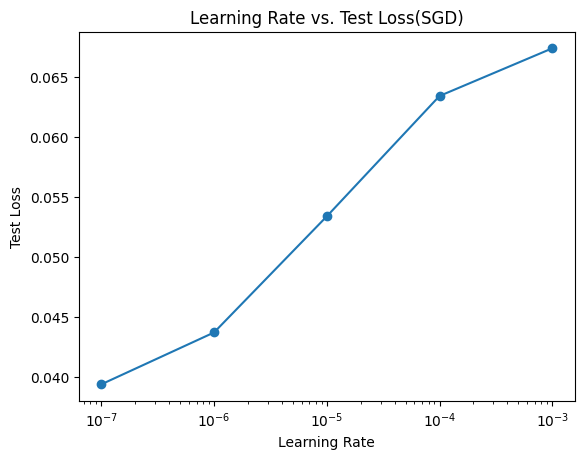

In [10]:
# Plot the results
plt.plot(learning_rates, losses, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Test Loss')
plt.title('Learning Rate vs. Test Loss(SGD)')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.show()

##### Identifying the best Learning rates for the given dataset(using Adam optimizer)

In [11]:
#learning_rates = [0.001,0.0001,0.00001,0.000001]
# Initialize lists to store results
losses = []

In [12]:
for learning_rate in learning_rates:
    # Set random seed for reproducibility

    # Create a Sequential model
    model = Sequential()

    # Add a hidden layer with 3 neurons and ReLU activation
    model.add(Dense(3, input_dim=5, activation='relu',kernel_regularizer=l2(0.01)))

    # Add the output layer with 1 neuron (for regression task)
    model.add(Dense(1, activation='linear'))  # Linear activation for regression

    # Choose an optimizer with the current learning rate
    custom_optimizer = Adam(learning_rate=learning_rate)

    # Compile the model with MSE loss and the selected optimizer
    model.compile(loss='mean_squared_error', optimizer=custom_optimizer)

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0,shuffle=True)

    # Evaluate the model and store the loss
    loss = model.evaluate(X_test, y_test)
    losses.append(loss)
    # Make predictions on the test set
    #y_pred = model.predict(X_test)
    
    # Optionally, you can print or analyze the predictions
    print(f'Learning Rate: {learning_rate}, Test Loss: {loss:.4f}')
    #print(f'Predictions:\n{y_pred}')

1/1 [==============================] - 0s 21ms/step - loss: 0.0247
Learning Rate: 0.001, Test Loss: 0.0247
1/1 [==============================] - 0s 19ms/step - loss: 0.0388
Learning Rate: 0.0001, Test Loss: 0.0388
1/1 [==============================] - 0s 22ms/step - loss: 0.0492
Learning Rate: 1e-05, Test Loss: 0.0492
1/1 [==============================] - 0s 18ms/step - loss: 0.0707
Learning Rate: 1e-06, Test Loss: 0.0707
1/1 [==============================] - 0s 22ms/step - loss: 0.0562
Learning Rate: 1e-07, Test Loss: 0.0562


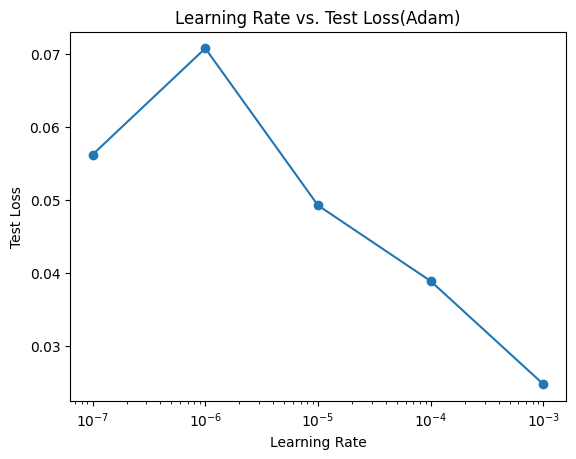

In [13]:
# Plot the results
plt.plot(learning_rates, losses, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Test Loss')
plt.title('Learning Rate vs. Test Loss(Adam)')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.show()

##### Training neural network with best learning rate = 0.001 and suitable optimizer with min loss in my case ADAM and activation func RELU

In [14]:
# Set random seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


In [15]:
# Create a Sequential model
model = Sequential()

# Add a hidden layer with 3 neurons and ReLU activation
# Dont add regularizer
model.add(Dense(3, input_dim=5, activation='relu'))

# Add the output layer with 1 neuron (for regression task)
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Choose an optimizer with the current learning rate
custom_optimizer = Adam(learning_rate=0.001)

# Compile the model with MSE loss and the selected optimizer
model.compile(loss='mean_squared_error', optimizer=custom_optimizer)

# Train the model
history = model.fit(X_train, y_train, epochs=750, batch_size=32, validation_data=(X_test, y_test), verbose=1,shuffle=True)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions to get actual values
y_pred_actual = scaler_y.inverse_transform(y_pred)

# You can also inverse transform the test set labels for comparison
y_test_actual = scaler_y.inverse_transform(y_test)
# Evaluate the model and store the loss
# loss = model.evaluate(X_test, y_test)
# losses.append(loss)
# Make predictions on the test set
#y_pred = model.predict(X_test)

# Optionally, you can print or analyze the predictions
#print(f'Learning Rate: {learning_rate}, Test Loss: {loss:.4f}')

Epoch 1/750


3/3 [==============================] - 1s 88ms/step - loss: 0.0878 - val_loss: 0.0454
Epoch 2/750
3/3 [==============================] - 0s 22ms/step - loss: 0.0865 - val_loss: 0.0444
Epoch 3/750
3/3 [==============================] - 0s 23ms/step - loss: 0.0850 - val_loss: 0.0435
Epoch 4/750
3/3 [==============================] - 0s 21ms/step - loss: 0.0836 - val_loss: 0.0426
Epoch 5/750
3/3 [==============================] - 0s 15ms/step - loss: 0.0822 - val_loss: 0.0418
Epoch 6/750
3/3 [==============================] - 0s 13ms/step - loss: 0.0808 - val_loss: 0.0411
Epoch 7/750
3/3 [==============================] - 0s 12ms/step - loss: 0.0794 - val_loss: 0.0404
Epoch 8/750
3/3 [==============================] - 0s 12ms/step - loss: 0.0782 - val_loss: 0.0397
Epoch 9/750
3/3 [==============================] - 0s 13ms/step - loss: 0.0769 - val_loss: 0.0390
Epoch 10/750
3/3 [==============================] - 0s 13ms/step - loss: 0.0754 - val_loss: 0.0383
Epoch 11/750
3/3 [=============

In [16]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

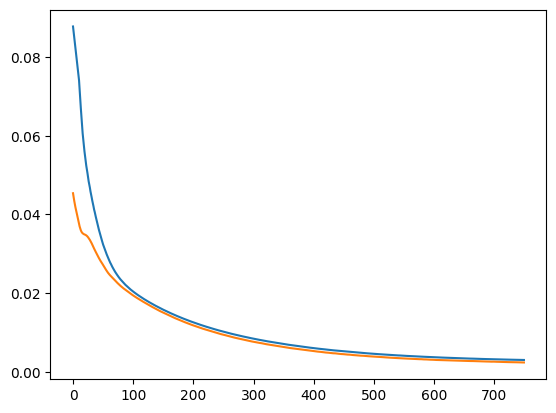

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [18]:
y_pred_actual.flatten()

array([156.81773,  37.11104, 577.3944 , 175.49736,  69.73576,  72.05328,
       183.35721, 264.28226,  85.49695, 372.52606, 559.7922 , 144.43193,
       535.49335,  43.6125 , 370.40817,  93.59962,  51.28775, 307.98676,
       974.91327, 331.6729 ], dtype=float32)

In [19]:
y_test_actual.flatten()

array([163.,   3., 613., 164.,  62.,  39., 221., 256.,  88., 333., 683.,
       103., 668.,  27., 328., 115.,  43., 280., 861., 312.])

In [20]:
avg_mag_diff = np.mean(np.abs(y_pred_actual.flatten() - y_test_actual.flatten()))

##### Calculating Mean absolute Error

In [21]:
print(f"Average Magnitude difference also called Mean absolute Error is {avg_mag_diff}")

Average Magnitude difference also called Mean absolute Error is 38.17838077545166


##### Calculating Mean absolute Percentage Error 

In [22]:
np.min(np.abs(y_pred_actual.flatten() - y_test_actual.flatten())), np.max(np.abs(y_pred_actual.flatten() - y_test_actual.flatten()))


(2.5030517578125, 132.50665283203125)

In [23]:
print(f"Mean absolute Percentage Error: {np.mean(np.abs((y_pred_actual.flatten() - y_test_actual.flatten())/y_test_actual.flatten())) * 100} ")

Mean absolute Percentage Error: 75.29147139919175 


In [24]:
print(f"Accuracy: {1 - np.mean(np.abs((y_pred_actual.flatten() - y_test_actual.flatten())/y_pred_actual.flatten()))}")

Accuracy: 0.8032745584244836


In [25]:
y_pred_actual.flatten()
# [142.00684,  25.33348, 533.09644, 138.39452,  87.55455,  56.03157,
    #    177.67517, 292.2555 , 106.19273, 528.2125 , 414.0333 , 241.08716,
    #    352.9569 ,  32.04152, 414.65344,  89.40239,  53.55684, 339.69608,
    #    529.84436, 533.09644]

array([156.81773,  37.11104, 577.3944 , 175.49736,  69.73576,  72.05328,
       183.35721, 264.28226,  85.49695, 372.52606, 559.7922 , 144.43193,
       535.49335,  43.6125 , 370.40817,  93.59962,  51.28775, 307.98676,
       974.91327, 331.6729 ], dtype=float32)

In [26]:
y_test_actual.flatten()

array([163.,   3., 613., 164.,  62.,  39., 221., 256.,  88., 333., 683.,
       103., 668.,  27., 328., 115.,  43., 280., 861., 312.])

In [27]:
# Save the model to a file
model.save('trained_model.h5')

c:\Users\Arlene\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# Load the saved model
loaded_model = keras.models.load_model('trained_model.h5')

# Make predictions on new data (X_test)
y_pred = loaded_model.predict(X_train)

# Inverse transform the scaled predictions to get actual values
y_pred_actual = scaler_y.inverse_transform(y_pred)

3/3 [==============================] - 0s 2ms/step


In [29]:
y_pred_actual.flatten()

array([ 227.28966 ,  246.64732 ,  114.04426 ,  238.42357 ,  136.7428  ,
        320.43378 ,  131.12039 ,  122.36763 ,  139.38306 ,  328.7618  ,
        214.90639 ,  275.8421  ,  156.67767 ,  308.92477 ,  183.20763 ,
        161.36302 , 2797.2412  ,  110.08596 , 1144.3367  ,  369.12997 ,
         81.98982 ,  349.41464 ,  936.9527  ,  238.79114 ,  164.87363 ,
        122.94501 ,  131.84607 , 1038.1417  ,  171.26799 ,   45.93824 ,
         87.63016 ,  297.57333 ,   97.2697  ,  132.1303  ,  874.0406  ,
        141.4703  , 1012.49445 ,  106.58312 ,  243.12354 ,  210.0389  ,
        193.80247 ,  620.2393  ,  104.682495,  270.82364 , 2143.1658  ,
         57.620438, 1276.3945  ,  318.86136 ,  181.04932 ,  308.55692 ,
         59.06941 ,  495.40805 , 2555.5073  ,  421.65793 ,   93.71621 ,
        167.92264 ,   41.339878,  668.8389  ,   44.351856,  352.16895 ,
        641.0031  ,  271.80164 ,   72.40693 ,  552.20514 ,   64.38378 ,
        190.72455 ,  374.34067 ,  332.18527 ,   41.88945 ,  727.

In [30]:
y_train_actual = scaler_y.inverse_transform(y_train)

In [31]:
avg_mag_diff = np.mean(np.abs(y_pred_actual.flatten() - y_train_actual.flatten()))

In [32]:
avg_mag_diff

47.34820122718811